# Text Classification with the 20 newsgroups dataset

**Objective:**<br />

- In this notebook, I will implement all the functions required to build a multiclass classification model to classify texts.

**After this code:**<br />

- I'll have a trained model to predict texts in four categories. For this, I used mainly `sklearn` package.


Let's get started!

## 1 - Packages

Let's first import all the packages that you will need during this code.

- **scikit-learn** is a free machine learning library for Python.
- **numPy** is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices.
- **matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **itertools** is a module in python, it is used to iterate over data structures that can be stepped over using a for-loop. Such data structures are also known as iterables. This module incorporates functions that utilize computational resources efficiently.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

## 2 - Import data

In this example, I will use one dataset from sklearn, [The 20 newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).
This dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training and the other one for testing. The split between the train and test set is based upon a messages posted before and after a specific date.

For this example, I will use only four categories (`rec.autos`, `sci.electronics`, `comp.graphics`, `alt.atheism`,`sci.space`).

In [2]:
%%time
# Define categories that I will use
categories = ['rec.autos', 'sci.electronics', 'comp.graphics', 'alt.atheism','sci.space']

# Importing training set
data_train = fetch_20newsgroups(subset='train',
                                categories=categories,
                                shuffle=True,
                                random_state=2017,
                                remove=('headers','footers','quotes'))

# Importing test set
data_test = fetch_20newsgroups(subset='test',
                                categories=categories,
                                shuffle=True,
                                random_state=2017,
                                remove=('headers','footers','quotes'))

Wall time: 1.93 s


## 3 - Split into train and test

In [3]:
# Investigating what was imported 
list(data_train)

['data', 'filenames', 'target_names', 'target', 'DESCR']

In [4]:
# training set
X_train = data_train.data
y_train = data_train.target

print("Train Dataset")
print("%d documents" % len(data_train.data))
print("%d categories" % len(data_train.target_names))

Train Dataset
2842 documents
5 categories


In [5]:
# test set
X_test = data_test.data
y_test = data_test.target

print("Test Dataset")
print("%d documents" % len(data_test.data))
print("%d categories" % len(data_test.target_names))

Test Dataset
1891 documents
5 categories


In [6]:
# Example of data of "rec.autos"
num_example = 90
print('Classification:', categories[y_test[num_example]],'(', y_test[num_example], ')')
print(data_train.data[num_example])

Classification: rec.autos ( 0 )
Does any one know if the 6551 is timing/pin compatible with the 6551.. 
It seems the 6551 has in iheirent bug with cts/rts handshaking and i need
a suitable pin replacement to put in my serial card... possibly a buffered
version perhaps?




In [7]:
# Example of data of "sci.electronics"
num_example = 1
print('Classification:', categories[y_test[num_example]],'(', y_test[num_example], ')')
print(data_train.data[num_example])

Classification: sci.electronics ( 1 )

  The commercial uses of a transportation system between already-settled-
and-civilized areas are obvious.  Spaceflight is NOT in this position.
The correct analogy is not with aviation of the '30's, but the long
transocean voyages of the Age of Discovery.  It didn't require gov't to
fund these as long as something was known about the potential for profit
at the destination.  In practice, some were gov't funded, some were private.
But there was no way that any wise investor would spend a large amount
of money on a very risky investment with no idea of the possible payoff.
  I am sure that a thriving spaceflight industry will eventually develop,
and large numbers of people will live and work off-Earth.  But if you ask
me for specific justifications other than the increased resource base, I
can't give them.  We just don't know enough.  The launch rate demanded by
existing space industries is just too low to bring costs down much, and
we are very muc

In [8]:
# Example of data of "comp.graphics"
num_example = 20
print('Classification:', categories[y_test[num_example]],'(', y_test[num_example], ')')
print(data_train.data[num_example])

Classification: comp.graphics ( 2 )

	I just went through this mess in New Jersey (I'm still waiting for a
refund as well), namely, that the original company made a mistake and left me
in the lurch.  My recourse was through NJ's insurance dept. Office of Consumer
Protection.  You should have a similar office in your state.  Make use of it.

Good luck,


In [9]:
# Example of data of "alt.atheism"
num_example = 93
print('Classification:', categories[y_test[num_example]],'(', y_test[num_example], ')')
print(data_train.data[num_example])

Classification: alt.atheism ( 3 )

No.  No.  NOOO!!!

The ground (green) wire is for safety.  No current is supposed to flow in it
under normal conditions.  This means that there's normally no voltage drop in
it either.  It is supposed to be safe to touch the ground wire... even if
you're grounded in some other way at the same time.  

The neutral (white) wire is, as Dave Vanderbyl correctly said, the return for
the hot wire.  Since current flows in it, there's a voltage drop.  If you
plug a heavy load into a properly-wired grounded outlet, you can commonly 
measure a volt or so of difference between neutral and ground.  

They are supposed to be connected together at the breaker panel... but nowhere,
repeat NOwhere, else.  (Well, almost.  There are strange exceptions for things
like sub-panels.)

What you CAN do if you want three-prong outlets without additional wiring is 
to use a GFCI outlet (or breaker, but the outlet will be cheaper).  In fact,
depending on where you are putting y

In [10]:
# Example of data of "sci.space"
num_example = 1025
print('Classification:', categories[y_test[num_example]],'(', y_test[num_example], ')')
print(data_train.data[num_example])

Classification: sci.space ( 4 )


Ya, he cut me off on 128 the other day, he drives like a crazy person.
I'd have to say he's responsible for most accidents, they really should
pull his licence.

-Steve



## 4 - Feature Extraction

For this study, I extract [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) vectors of unigram tokens. TF-IDF (_term frequency–inverse document frequency_), is a numerical statistic that is intended to reflect how important a word is to a document in a collection. The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

In [11]:
vectorizer = TfidfVectorizer(sublinear_tf=True,
                             smooth_idf=True,
                             max_df=0.5,
                             ngram_range=(1,2),
                             stop_words='english')

In [12]:
X_train = vectorizer.fit_transform(X_train)

print("Train Dataset")
print("Number of samples: %d, number of features: %d" % X_train.shape)

Train Dataset
Number of samples: 2842, number of features: 219812


In [13]:
X_test = vectorizer.transform(X_test)

print("Test Dataset")
print("Number of samples: %d, number of features: %d" % X_test.shape)

Test Dataset
Number of samples: 1891, number of features: 219812


In [43]:
# It will give you the list of feature names. As an example, I put few here.
#vectorizer.get_feature_names()
vectorizer.get_feature_names()[19000:19010]

['analog scope',
 'analog sf',
 'analog signal',
 'analog simpson',
 'analog speedo',
 'analog switch',
 'analog switches',
 'analog time',
 'analog timer',
 'analog trip']

In [48]:
# It will give you a dict with feature names as keys and their index in the matrix produced as values.
# As an example, I put few here.
#vectorizer.vocabulary_
list(vectorizer.vocabulary_.items())[:10]

[('hi', 93494),
 ('interested', 102742),
 ('rayshade', 160398),
 ('00', 0),
 ('managed', 121310),
 ('make', 120637),
 ('chessboard', 40430),
 ('unfortunately', 204164),
 ('knight', 109022),
 ('horse', 95237)]

In [16]:
# It is one way to see this as a dataset. It will use much memory (over 3.1 GiB)
#pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names())

## 5 - Machine Learning

In [17]:
# Print the confusion matrix
def plot_confusion_matrix(cm, classes=['Not Fraud', 'Fraud'],
                          normalize=False,
                          title='Fraud Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    From:
        http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-
        examples-model-selection-plot-confusion-matrix-py
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

### 5.1 - Naive Bayes Classifier

A Naive Bayes classifier is a simple probabilistic classifier based on applying Bayes' theorem (from Bayesian
statistics) with strong (naive) independence assumptions.

In [18]:
%%time
clf_NB = MultinomialNB()
clf_NB = clf_NB.fit(X_train, y_train)

Wall time: 32.9 ms


In [19]:
y_train_pred = clf_NB.predict(X_train)
y_test_pred = clf_NB.predict(X_test)

In [20]:
# Classification Report
print("Classification Report - Train")
print("Train accuracy score:", metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

print("Classification Report - Test")
print("Test accuracy score:", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Classification Report - Train
Train accuracy score: 0.9757213230119635
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       480
           1       0.99      0.97      0.98       584
           2       0.90      1.00      0.95       594
           3       1.00      0.97      0.98       591
           4       1.00      0.97      0.98       593

    accuracy                           0.98      2842
   macro avg       0.98      0.98      0.98      2842
weighted avg       0.98      0.98      0.98      2842

Classification Report - Test
Test accuracy score: 0.8043363299841354
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       319
           1       0.79      0.87      0.83       389
           2       0.76      0.89      0.82       396
           3       0.87      0.69      0.77       393
           4       0.75      0.85      0.80       394

    accuracy                           0.80  

Confusion matrix, without normalization


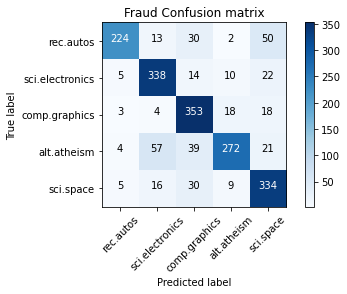

In [21]:
# Create a confusion matrix
km_cm = metrics.confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, classes=categories)

In [22]:
# Let’s take a look at what the most informative features are:
def show_top10(classifier, vectorizer, categories):
    feature_names = np.asarray(vectorizer.get_feature_names())
    for i, category in enumerate(categories):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        print("[%s]: %s" % (category, " ".join(feature_names[top10])))

show_top10(clf_NB, vectorizer, data_train.target_names)

[alt.atheism]: said atheism does religion say just think don people god
[comp.graphics]: hi looking does program know image file files thanks graphics
[rec.autos]: know dealer don engine good new just like cars car
[sci.electronics]: good circuit thanks don used power does know like use
[sci.space]: shuttle earth think launch moon orbit just like nasa space


### 5.2 - Support Vector Machines

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.

In [23]:
%%time
svm_clf = SVC(kernel='rbf', gamma=1.0, C=1000, random_state=13)
svm_clf = svm_clf.fit(X_train, y_train)

Wall time: 6.3 s


In [24]:
y_train_pred = svm_clf.predict(X_train)
y_test_pred = svm_clf.predict(X_test)

In [25]:
# Classification Report
print("Classification Report - Train")
print("Train accuracy score:", metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

print("Classification Report - Test")
print("Test accuracy score:", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Classification Report - Train
Train accuracy score: 0.9781843771991555
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       480
           1       1.00      0.97      0.99       584
           2       0.91      1.00      0.95       594
           3       1.00      0.97      0.99       591
           4       1.00      0.97      0.99       593

    accuracy                           0.98      2842
   macro avg       0.98      0.98      0.98      2842
weighted avg       0.98      0.98      0.98      2842

Classification Report - Test
Test accuracy score: 0.7974616604970914
              precision    recall  f1-score   support

           0       0.88      0.75      0.81       319
           1       0.80      0.84      0.82       389
           2       0.77      0.87      0.82       396
           3       0.78      0.73      0.75       393
           4       0.79      0.79      0.79       394

    accuracy                           0.80  

Confusion matrix, without normalization


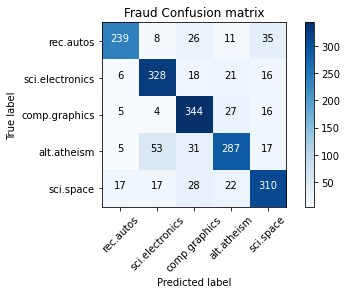

In [26]:
# Create a confusion matrix
km_cm = metrics.confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, classes=categories)

### 5.3 - Random Forest

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree.

In [27]:
%%time
rf_clf = RandomForestClassifier(criterion='gini',
                                #max_depth=8,
                                n_estimators=1000,
                                n_jobs=-1,
                                random_state=13)
rf_clf = rf_clf.fit(X_train, y_train)

Wall time: 45.7 s


In [28]:
y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)

In [29]:
# Classification Report
print("Classification Report - Train")
print("Train accuracy score:", metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

print("Classification Report - Test")
print("Test accuracy score:", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Classification Report - Train
Train accuracy score: 0.9781843771991555
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       480
           1       1.00      0.97      0.99       584
           2       0.91      1.00      0.95       594
           3       1.00      0.97      0.99       591
           4       1.00      0.97      0.99       593

    accuracy                           0.98      2842
   macro avg       0.98      0.98      0.98      2842
weighted avg       0.98      0.98      0.98      2842

Classification Report - Test
Test accuracy score: 0.7440507667900582
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       319
           1       0.72      0.84      0.77       389
           2       0.63      0.88      0.74       396
           3       0.79      0.58      0.67       393
           4       0.86      0.70      0.77       394

    accuracy                           0.74  

Confusion matrix, without normalization


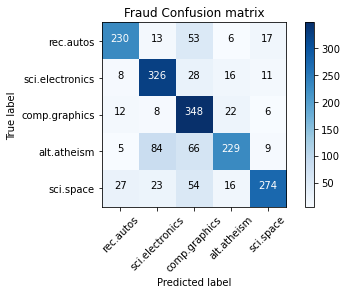

In [30]:
# Create a confusion matrix
km_cm = metrics.confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, classes=categories)

### 5.4 - Gradient Boosting

Gradient boosting is a machine learning technique for regression and classification problems that produce a prediction model in the form of an ensemble of weak prediction models. The idea of gradient boosting is that you can combine a group of relatively weak prediction models to build a stronger prediction model.

In [31]:
%%time
gb_clf = GradientBoostingClassifier(learning_rate=0.001, n_estimators=100, random_state=13)
gb_clf = gb_clf.fit(X_train, y_train)

Wall time: 1min 25s


In [32]:
y_train_pred = gb_clf.predict(X_train)
y_test_pred = gb_clf.predict(X_test)

In [33]:
# Classification Report
print("Classification Report - Train")
print("Train accuracy score:", metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

print("Classification Report - Test")
print("Test accuracy score:", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Classification Report - Train
Train accuracy score: 0.5566502463054187
              precision    recall  f1-score   support

           0       0.96      0.34      0.50       480
           1       0.91      0.44      0.59       584
           2       0.93      0.51      0.66       594
           3       0.32      0.95      0.48       591
           4       0.94      0.50      0.65       593

    accuracy                           0.56      2842
   macro avg       0.81      0.55      0.58      2842
weighted avg       0.80      0.56      0.58      2842

Classification Report - Test
Test accuracy score: 0.5314648334214701
              precision    recall  f1-score   support

           0       0.96      0.34      0.51       319
           1       0.85      0.48      0.61       389
           2       0.92      0.46      0.61       396
           3       0.31      0.91      0.46       393
           4       0.86      0.43      0.57       394

    accuracy                           0.53  

Confusion matrix, without normalization


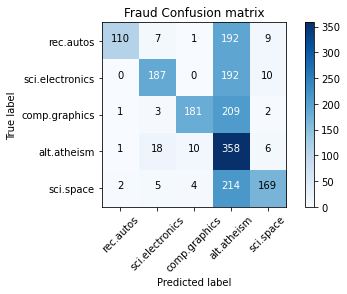

In [34]:
# Create a confusion matrix
km_cm = metrics.confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, classes=categories)

### 5.5 - Voting Classifier

A Voting Classifier is a machine learning model that trains on an ensemble of numerous models and predicts an output (class) based on their highest probability of chosen class as the output.
It simply aggregates the findings of each classifier passed into Voting Classifier and predicts the output class based on the highest majority of voting.

In [35]:
%%time
# Define the three classifiers to use in the ensemble
clf1 = MultinomialNB()
clf2 = SVC(kernel='rbf', gamma=1.0, C=1000, random_state=13)
clf3 = RandomForestClassifier(random_state=13)
clf4 = GradientBoostingClassifier(random_state=13)

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('nb', clf1), ('svc', clf2), ('rf', clf3), ('gb', clf4)], voting='hard')
ensemble_model.fit(X_train, y_train)

Wall time: 1min 33s


VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('svc', SVC(C=1000, gamma=1.0, random_state=13)),
                             ('rf', RandomForestClassifier(random_state=13)),
                             ('gb',
                              GradientBoostingClassifier(random_state=13))])

In [36]:
y_train_pred = ensemble_model.predict(X_train)
y_test_pred = ensemble_model.predict(X_test)

In [37]:
# Classification Report
print("Classification Report - Train")
print("Train accuracy score:", metrics.accuracy_score(y_train, y_train_pred))
print(metrics.classification_report(y_train, y_train_pred))

print("Classification Report - Test")
print("Test accuracy score:", metrics.accuracy_score(y_test, y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Classification Report - Train
Train accuracy score: 0.9781843771991555
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       480
           1       1.00      0.97      0.99       584
           2       0.91      1.00      0.95       594
           3       1.00      0.97      0.99       591
           4       1.00      0.97      0.99       593

    accuracy                           0.98      2842
   macro avg       0.98      0.98      0.98      2842
weighted avg       0.98      0.98      0.98      2842

Classification Report - Test
Test accuracy score: 0.7895293495505024
              precision    recall  f1-score   support

           0       0.85      0.76      0.81       319
           1       0.77      0.86      0.81       389
           2       0.74      0.88      0.80       396
           3       0.79      0.68      0.73       393
           4       0.83      0.76      0.79       394

    accuracy                           0.79  

Confusion matrix, without normalization


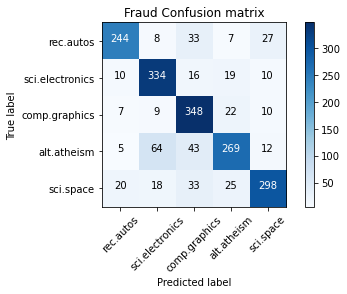

In [38]:
# Create a confusion matrix
km_cm = metrics.confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix in a figure to visualize results 
plot_confusion_matrix(km_cm, classes=categories)

-----------------------